In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from scipy import stats

In [33]:
FIGURE_SIZE = (8, 6)

In [34]:
def plot_beta_prior_and_posterior(r, s, m, y, show_map=False, show_lmse=False):
    x = np.linspace(0, 1, 100)
    prior = stats.beta.pdf(x, r, s)
    posterior = stats.beta.pdf(x, r+y, s+m-y)
    if show_lmse:
        x_lmse = (r+y)/(r+s+m)
    else:
        x_lmse = None
        
    if show_map:
        x_map = (r + y -1) / (r + s + m - 2)
    else:
        x_map = None
    plot_prior_posterior(x, prior, posterior, (0, 1),
                         prior_label=f'Prior: Beta({r}, {s})',
                         posterior_label=f'Posterior: Beta({r+y}, {s+m-y})',
                         x_map=x_map, x_lmse=x_lmse)
    

def plot_gaussian_prior_and_posterior(μ_x, σ, ys, range_in_σs=3.5, show_map=False, show_lmse=False):
    n = len(ys)
    posterior_σ = np.sqrt(σ**2 / (n + 1))
    posterior_mean = 1/(n+1) * (np.sum(ys) + μ_x)
    
    
    # Compute range for plot
    posterior_min = posterior_mean - (range_in_σs * posterior_σ)
    posterior_max = posterior_mean + (range_in_σs * posterior_σ)
    prior_min = μ_x - (range_in_σs * σ)
    prior_max = μ_x + (range_in_σs * σ)
    
    xmin = min(posterior_min, prior_min)
    xmax = max(posterior_max, prior_max)
    x = np.linspace(xmin, xmax, 100)
    if show_lmse:
        x_lmse = posterior_mean
    else:
        x_lmse = None
        
    if show_map:
        x_map = posterior_mean
    else:
        x_map = None

    
    prior = stats.norm.pdf(x, μ_x, σ)
    posterior = stats.norm.pdf(x, posterior_mean, posterior_σ)
    
    
    plot_prior_posterior(x, prior, posterior, (xmin, xmax), 'Prior', 'Posterior',
                         x_map=x_map, x_lmse=x_lmse)
    
def plot_prior_posterior(x, prior, posterior, xlim, 
                         prior_label, posterior_label,
                         x_map=None, x_lmse=None):
    
    plt.figure(figsize=FIGURE_SIZE)
    plt.plot(x, prior, lw=3, color='gold', label = prior_label)
    plt.plot(x, posterior, lw=3, color='darkblue', label = posterior_label)
    if x_map is not None:
        map_index = np.argmin(np.abs(x - x_map))
        posterior_map = posterior[map_index]
        label = f'MAP estimate: {x_map:0.2f}'
        plt.plot([x_map, x_map], [0, posterior_map], '--', lw=2.5, color='black', label=label)
    if x_lmse is not None:
        lmse_index = np.argmin(np.abs(x - x_lmse))
        posterior_lmse = posterior[lmse_index]
        label = f'LMSE estimate: {x_lmse:0.2f}'
        plt.plot([x_lmse, x_lmse], [0, posterior_lmse], '--', lw=1.5, color='red', label=label)
    #plt.legend(bbox_to_anchor=(1.32, 1.02))
    plt.legend()
    ymax = max(max(prior), max(posterior))
    plt.ylim(-0.3, ymax+0.1)
    plt.xlim(*xlim)
    plt.xlabel('$x$')
    plt.title('Prior $p(x)$ and posterior given observed data $y$ $p(x|y)$');

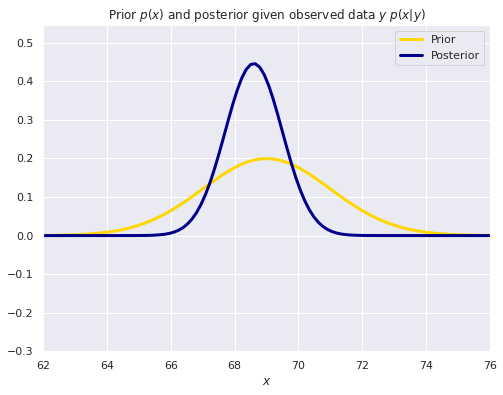

In [47]:
plot_gaussian_prior_and_posterior(5*12+9, 2, [5*12+6, 5*12+5, 6*12, 5*12+11])

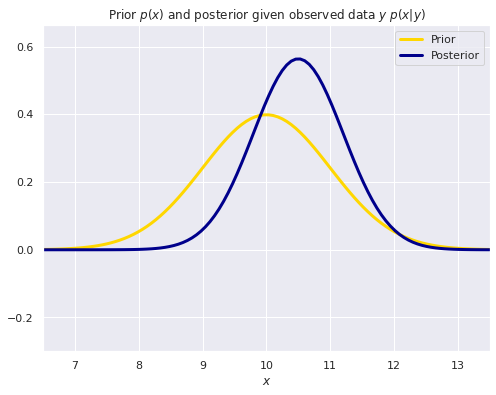

In [16]:
plot_gaussian_prior_and_posterior(10, 1, [11])

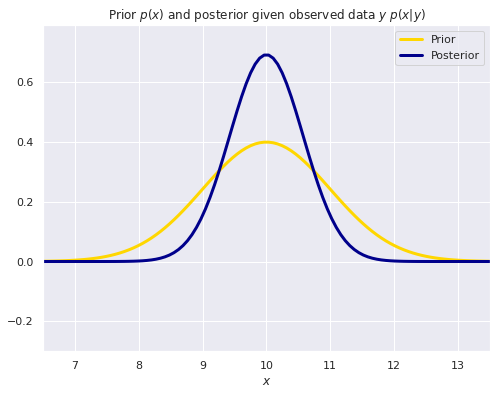

In [17]:
plot_gaussian_prior_and_posterior(10, 1, [0, 20])

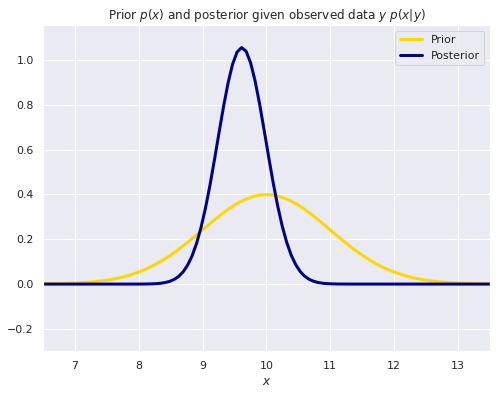

In [18]:
plot_gaussian_prior_and_posterior(10, 1, [9, 9.5, 9.8, 9.2, 9.7, 10.1])

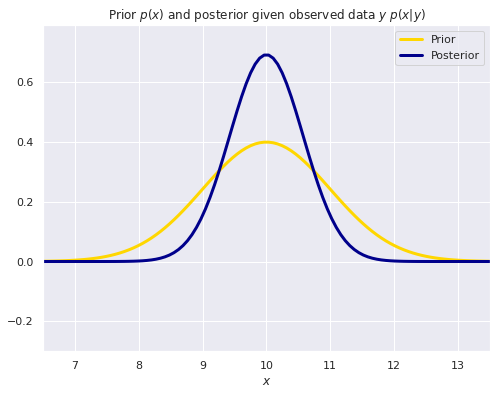

In [19]:
plot_gaussian_prior_and_posterior(10, 1, [-30, 50])

ValueError: Axis limits cannot be NaN or Inf

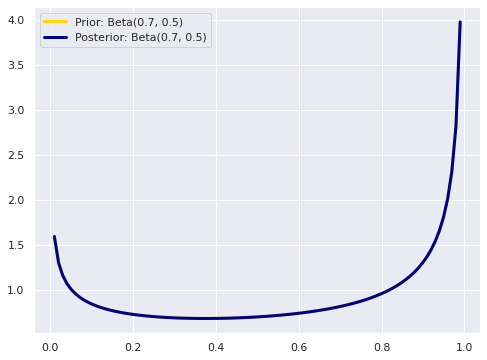

In [45]:
plot_beta_prior_and_posterior(0.7, 0.5, 0, 0)

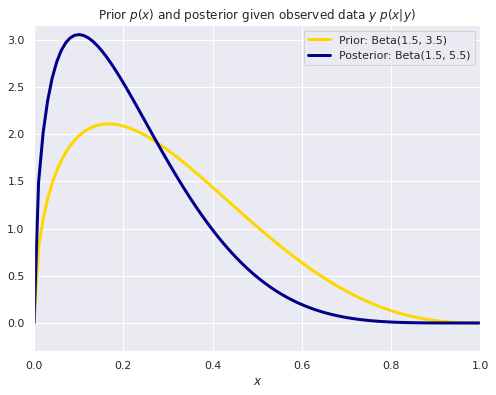

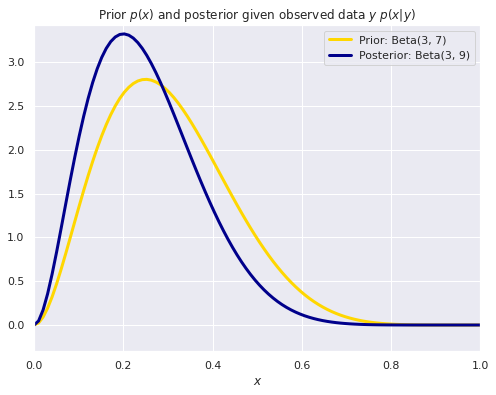

In [21]:
plot_beta_prior_and_posterior(1.5, 3.5, 2, 0)
plot_beta_prior_and_posterior(3, 7, 2, 0)

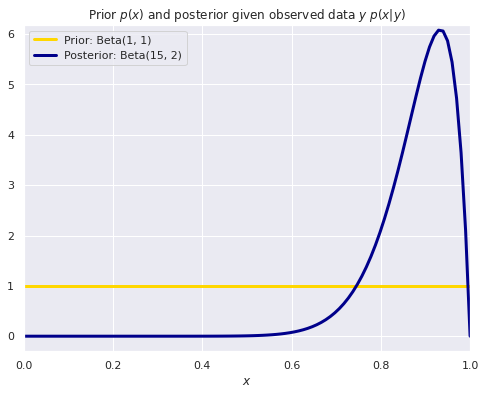

In [22]:
plot_beta_prior_and_posterior(1, 1, 15, 14)

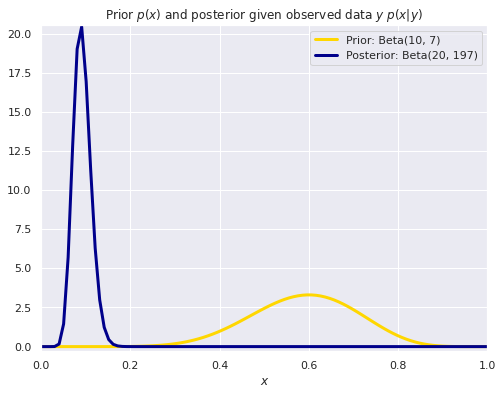

In [23]:
plot_beta_prior_and_posterior(10, 7, 200, 10)

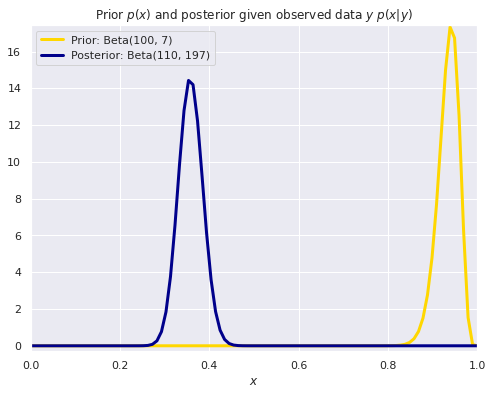

In [24]:
plot_beta_prior_and_posterior(100, 7, 200, 10)

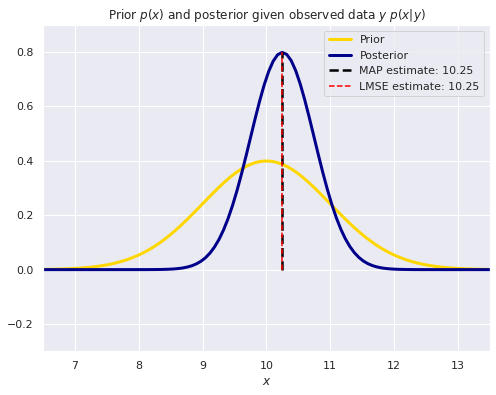

In [25]:
plot_gaussian_prior_and_posterior(10, 1, [11, 5, 15], show_map=True, show_lmse=True)

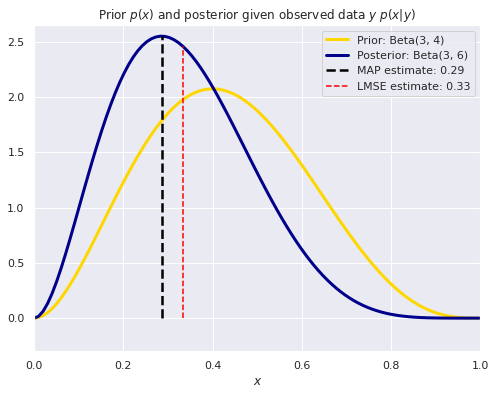

In [26]:
plot_beta_prior_and_posterior(3, 4, 2, 0, show_lmse=True, show_map=True)

In [48]:
from datascience import *

In [49]:
galton = Table.read_table('./galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


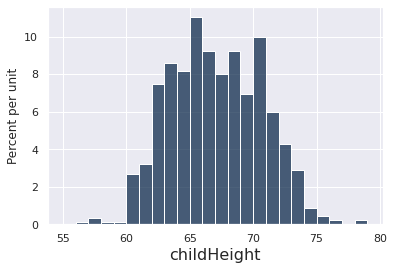

In [30]:
galton.hist('childHeight', bins=np.arange(55, 80, 1))

/home/jacob/.local/lib/python3.6/site-packages/datascience/tables.py:630: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


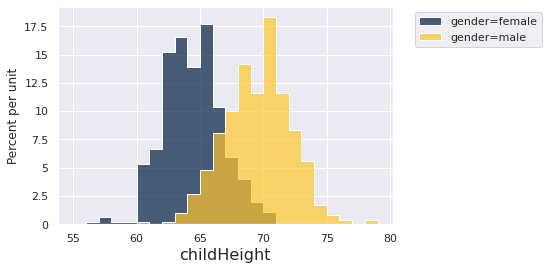

In [31]:
galton.hist('childHeight', group='gender', bins=np.arange(55, 80, 1))